In [1]:
import os
import tqdm

%matplotlib widget
import matplotlib
import matplotlib.pyplot
import seaborn

import datetime
import pytz

import pandas
import numpy
import pickle

import scipy
import scipy.stats

import accels_utils.frame_accels as FA

In [2]:
# Processing initialization
DATA_RECALCULATION = True
root_path   = '/Users/matthieu/Documents/proto3/active_sensing/AS_data_1region/'

data_paths = ['set6_20240130_diag_004/', 'set7_20240130_diag_004/', 'set8_20240130_unif_004/', 'set10_20240130_diag_01_a1/', 'set11_20240130_diag_01_a1/', 'set12_20240130_unif_01_a1/']

F_ACQ = 1600
ACT_ACC_PAIRING_TOP         = {0:1, 1:2, 2:3, 3:4, 4:6, 5:6, 6:9, 7:9}


ACC_NUMBER  = 10
AXIS        = ['X', 'Y', 'Z']

month       = '02'
day         = '13'


In [3]:
# Files list for the different configs
N_FILES_EXPECTED = 6*7

data = []
for folder in data_paths:
    data_path = root_path + folder
    
    
    files_list = sorted([x for x in os.listdir(data_path) if x.startswith('acc') and x.endswith('.txt')])
    print('Discovered {} files for waxed comb experiment (expected {})'.format(len(files_list), N_FILES_EXPECTED))

    # first naive plot
    water_configs = {0:'Empty', 1:'Fill1', 2:'Fill2', 3:'Fill3', 4:'Fill4', 5:'Fill5'}
    exp_configs = {
        'file':[x for x in files_list],
        'frequency':[int(x.split('.')[0].split('_')[-2][1:]) for x in files_list],
        'actuator':[int(x.split('.')[0].split('_')[-4][1:]) for x in files_list],
        'replicate':[int(x.split('.')[0].split('_')[-3][1:]) for x in files_list],
        'water_config_id':[int(x.split('.')[0].split('_')[-1][1:]) for x in files_list],
        'water_config':[water_configs[int(x.split('.')[0].split('_')[-1][1:])] for x in files_list]
    }
    exp_configs = pandas.DataFrame.from_dict(exp_configs)

    if DATA_RECALCULATION : 
        # Data extraction : taking around 25 minutes
        
        for _, exp in exp_configs.iterrows():
            dp = {'filename':[], 'data':[], 'frequency':[], 'water_config':[], 'actuator':[]}
            try:
                data_file = exp['file']
                with open(data_path + data_file) as accfile:
                    dat = accfile.readlines()
                dp['filename']        = data_file
                dp['set']             = int(folder.split('_')[0][3:])
                dp['type']            = folder.split('_')[-2]
                dp['data']            = FA.extract_data(dat)
                dp['frequency']       = exp['frequency']
                dp['actuator']        = exp['actuator']
                dp['replicate']       = exp['replicate']
                dp['water_config_id'] = exp['water_config_id']
                dp['water_config']    = exp['water_config']
            except : 
                print('There was a problem reading file {}'.format(data_path + data_file))
            data.append(dp)

data = pandas.DataFrame.from_dict(data)
data

100%|██████████| 863/863 [00:00<00:00, 17363.51it/s]

Discovered 42 files for waxed comb experiment (expected 42)



  0%|          | 0/860 [00:00<?, ?it/s]

Discovered 42 files for waxed comb experiment (expected 42)


100%|██████████| 860/860 [00:00<00:00, 18909.50it/s]

Discovered 42 files for waxed comb experiment (expected 42)



100%|██████████| 860/860 [00:00<00:00, 18915.16it/s]

Discovered 42 files for waxed comb experiment (expected 42)



100%|██████████| 862/862 [00:00<00:00, 18772.60it/s]

Discovered 42 files for waxed comb experiment (expected 42)



100%|██████████| 861/861 [00:00<00:00, 17356.49it/s]

Discovered 42 files for waxed comb experiment (expected 42)



100%|██████████| 863/863 [00:00<00:00, 16930.87it/s]


,filename,data,frequency,water_config,actuator,set,type,replicate,water_config_id
0,acc_s6_a4_r1_f500_w0.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,Empty,4,6,diag,1,0
1,acc_s6_a4_r1_f500_w1.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,Fill1,4,6,diag,1,1
2,acc_s6_a4_r1_f500_w2.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,Fill2,4,6,diag,1,2
3,acc_s6_a4_r1_f500_w3.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,Fill3,4,6,diag,1,3
4,acc_s6_a4_r1_f500_w4.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,Fill4,4,6,diag,1,4
...,...,...,...,...,...,...,...,...,...
247,acc_s12_a1_r7_f500_w1.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,Fill1,1,12,01,7,1
248,acc_s12_a1_r7_f500_w2.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,Fill2,1,12,01,7,2
249,acc_s12_a1_r7_f500_w3.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,Fill3,1,12,01,7,3
250,acc_s12_a1_r7_f500_w4.txt,"{1: {'X': {'val': [], 't': []}, 'Y': {'val': [...",500,Fill4,1,12,01,7,4


In [4]:
res_df = []

for exp_i, exp in data.iterrows():
    interesting_acc = ACT_ACC_PAIRING_TOP[exp['actuator']]
    
    res_dp = {'acc':interesting_acc, 'actuator':exp['actuator'], 'frequency':exp['frequency'], 'replicate':exp['replicate'], 'set':exp['set'], 'water_config_id':exp['water_config_id'], 'water_config':exp['water_config']}
    vals = exp['data'][interesting_acc]['Z']['val']

    fft_vals = []
    for i in range(8):
        sig_fft = vals[i*800:(i+2)*800]
        sig_fft = numpy.fft.fft(sig_fft-numpy.mean(sig_fft))
        fre_fft = numpy.fft.fftfreq(sig_fft.shape[0], 1/1600)[:int(sig_fft.shape[0]/2)]
        sig_fft = sig_fft[:int(sig_fft.shape[0]/2)]
        TOLERANCE_FREQ = 50
        min_index = numpy.argwhere(fre_fft > res_dp['frequency']-TOLERANCE_FREQ)[0][0]
        max_index = numpy.argwhere(fre_fft < res_dp['frequency']+TOLERANCE_FREQ)[-1][0]
        fft_vals.append(numpy.sum(numpy.abs(sig_fft[min_index:max_index])))
    # print(max_index)
    res_dp['fft_val'] = numpy.mean(numpy.array(fft_vals))

    res_df.append(res_dp)

res_df = pandas.DataFrame.from_dict(res_df)
res_df


,acc,actuator,frequency,replicate,set,water_config_id,water_config,fft_val
0,6,4,500,1,6,0,Empty,1874.839590
1,6,4,500,1,6,1,Fill1,1900.920504
2,6,4,500,1,6,2,Fill2,1665.813948
3,6,4,500,1,6,3,Fill3,1577.377137
4,6,4,500,1,6,4,Fill4,1466.948682
...,...,...,...,...,...,...,...,...
247,2,1,500,7,12,1,Fill1,936.202671
248,2,1,500,7,12,2,Fill2,935.061225
249,2,1,500,7,12,3,Fill3,800.275594
250,2,1,500,7,12,4,Fill4,713.853564


Actuator 1 : 
0-1 :  RanksumsResult(statistic=1.9998813443682026, pvalue=0.04551307808122934)
1-2 :  RanksumsResult(statistic=2.6036191087057734, pvalue=0.009224520892150574)
2-3 :  RanksumsResult(statistic=1.0942746978618467, pvalue=0.27383451888056054)
3-4 :  RanksumsResult(statistic=4.1884307400918965, pvalue=2.808900056939319e-05)
4-5 :  RanksumsResult(statistic=5.119193126778984, pvalue=3.068456166922232e-07)
0-2 :  RanksumsResult(statistic=3.911717598103843, pvalue=9.164203464686788e-05)
1-3 :  RanksumsResult(statistic=3.3331355739470045, pvalue=0.0008587308677850652)
2-4 :  RanksumsResult(statistic=4.892791465152396, pvalue=9.941572889400361e-07)
3-5 :  RanksumsResult(statistic=5.4965292294899655, pvalue=3.873389177713794e-08)
0-3 :  RanksumsResult(statistic=4.439988141899217, pvalue=8.996383470131512e-06)
1-4 :  RanksumsResult(statistic=5.471373489309234, pvalue=4.4656106610184185e-08)
2-5 :  RanksumsResult(statistic=5.54684070985143, pvalue=2.9087751417976993e-08)
0-4 :  Ranks

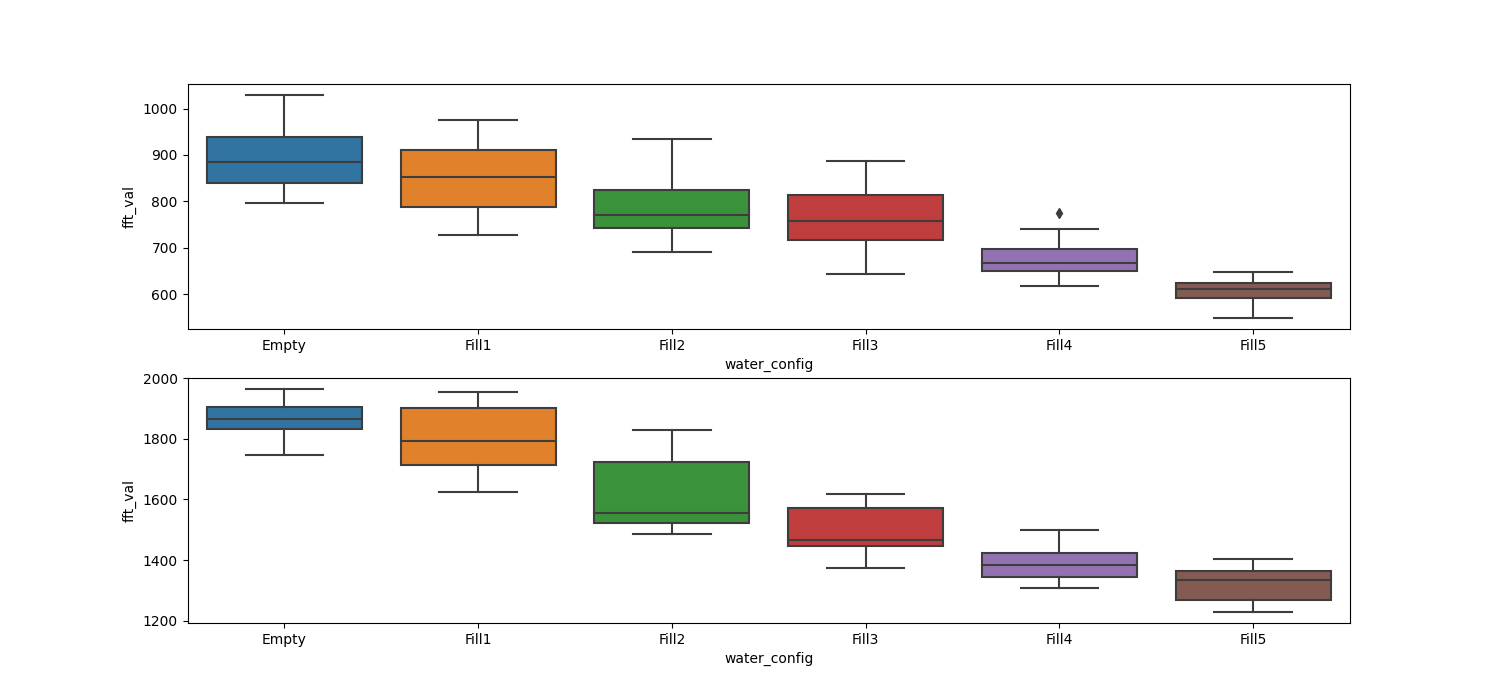

In [5]:
fig, ax = matplotlib.pyplot.subplots(2, 1, figsize=(15,7))
res_df_4 = res_df[res_df.actuator == 4]
res_df_1 = res_df[res_df.actuator == 1]
_ = seaborn.boxplot(data=res_df_1, x='water_config', y='fft_val', ax=ax[0])
_ = seaborn.boxplot(data=res_df_4, x='water_config', y='fft_val', ax=ax[1])

permutations = [[0,1],[1,2],[2,3],[3,4],[4,5],[0,2],[1,3],[2,4],[3,5],[0,3],[1,4],[2,5],[0,4],[1,5],[0,5]]
print("Actuator 1 : ")
for i,j in permutations:
    print("{}-{} : ".format(i,j), scipy.stats.ranksums(res_df_1[res_df_1.water_config_id == i].fft_val, res_df_1[res_df_1.water_config_id == j].fft_val))
print("##############################################################")
print("Actuator 4 : ")
for i,j in permutations:
    print("{}-{} : ".format(i,j), scipy.stats.ranksums(res_df_4[res_df_4.water_config_id == i].fft_val, res_df_4[res_df_4.water_config_id == j].fft_val))
print("##############################################################")

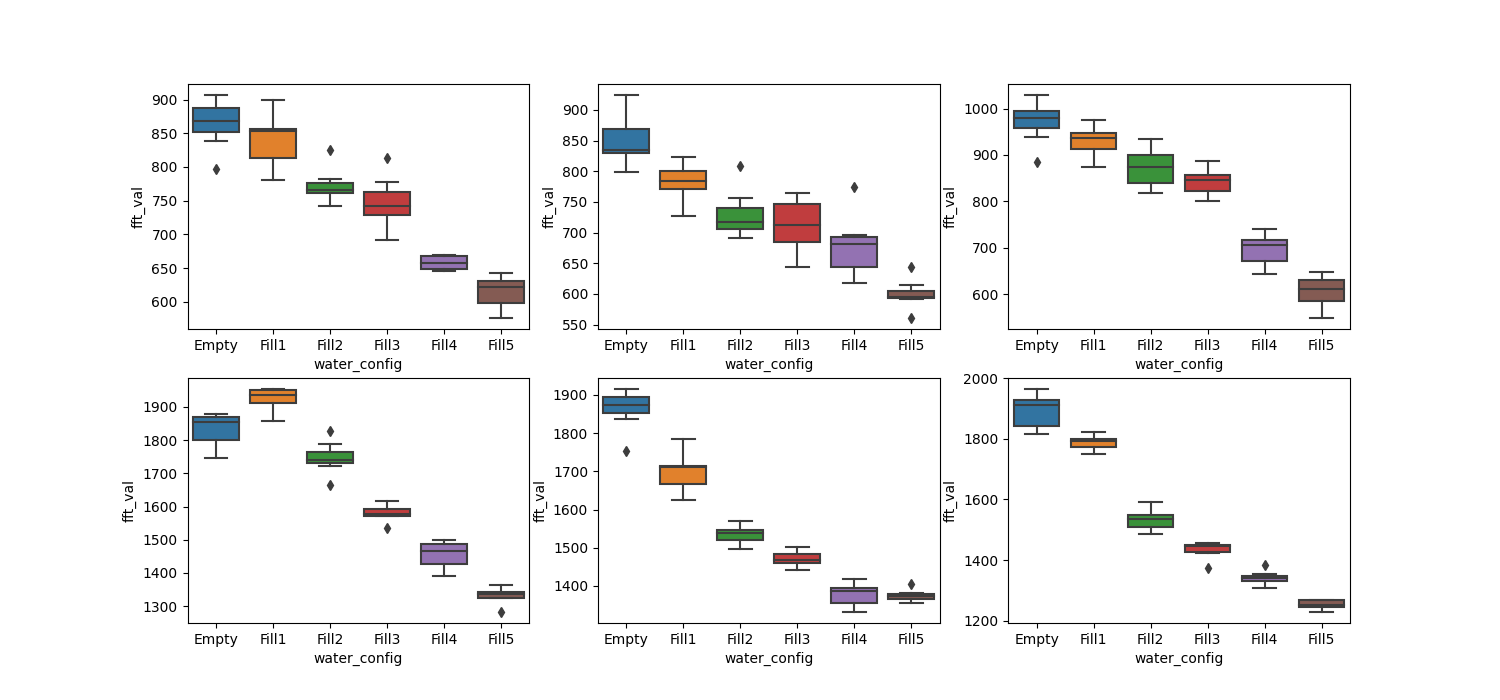

In [6]:
N_ACTS = 2
N_CONF = 3
fig, ax = matplotlib.pyplot.subplots(N_ACTS, N_CONF, figsize=(15,7))

ACTS    = [1, 4]
CONFS   = [[10,11,12], [6,7,8]]

for i in range(N_ACTS):
    res_df_act = res_df[res_df.actuator == ACTS[i]]
    for j in range(N_CONF):
        _ = seaborn.boxplot(data=res_df_act[res_df_act.set == CONFS[i][j]], x='water_config', y='fft_val', ax=ax[i,j])

In [22]:
res_df_act

,acc,actuator,frequency,replicate,set,water_config_id,water_config,fft_val
0,6,4,500,1,6,0,Empty,1874.839590
1,6,4,500,1,6,1,Fill1,1900.920504
2,6,4,500,1,6,2,Fill2,1665.813948
3,6,4,500,1,6,3,Fill3,1577.377137
4,6,4,500,1,6,4,Fill4,1466.948682
...,...,...,...,...,...,...,...,...
121,6,4,500,7,8,1,Fill1,1797.832562
122,6,4,500,7,8,2,Fill2,1563.009123
123,6,4,500,7,8,3,Fill3,1448.268645
124,6,4,500,7,8,4,Fill4,1332.530464


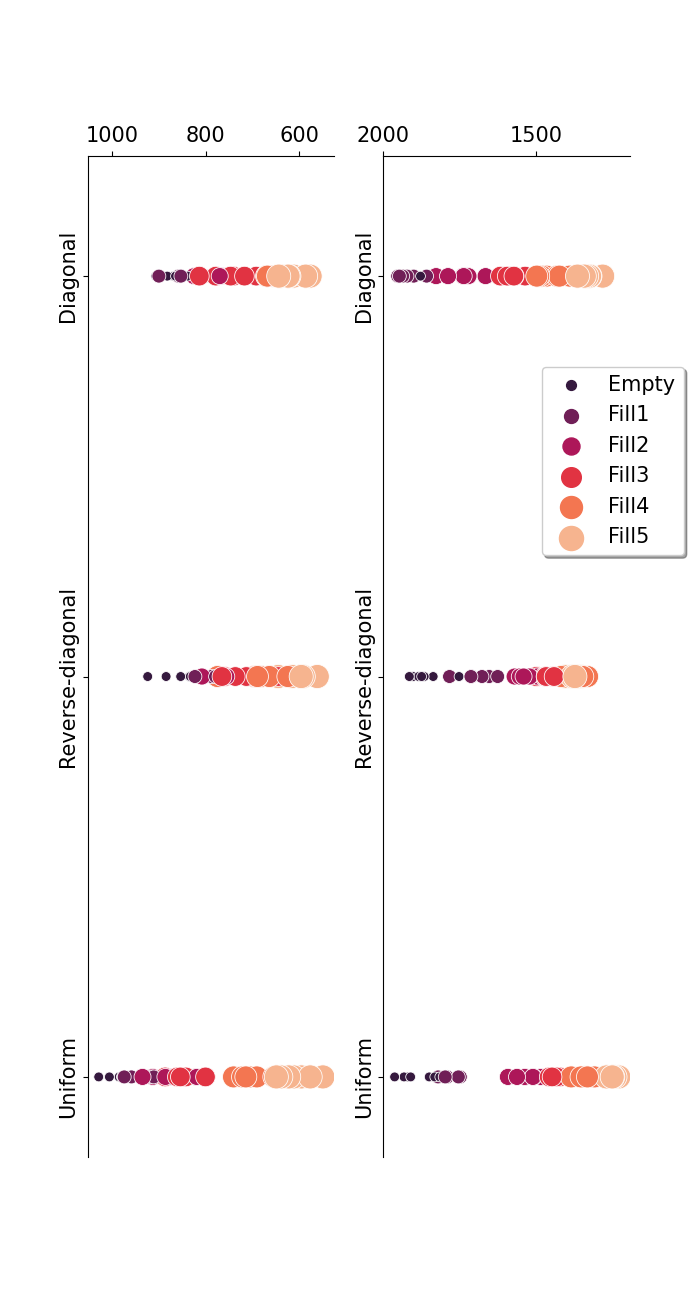

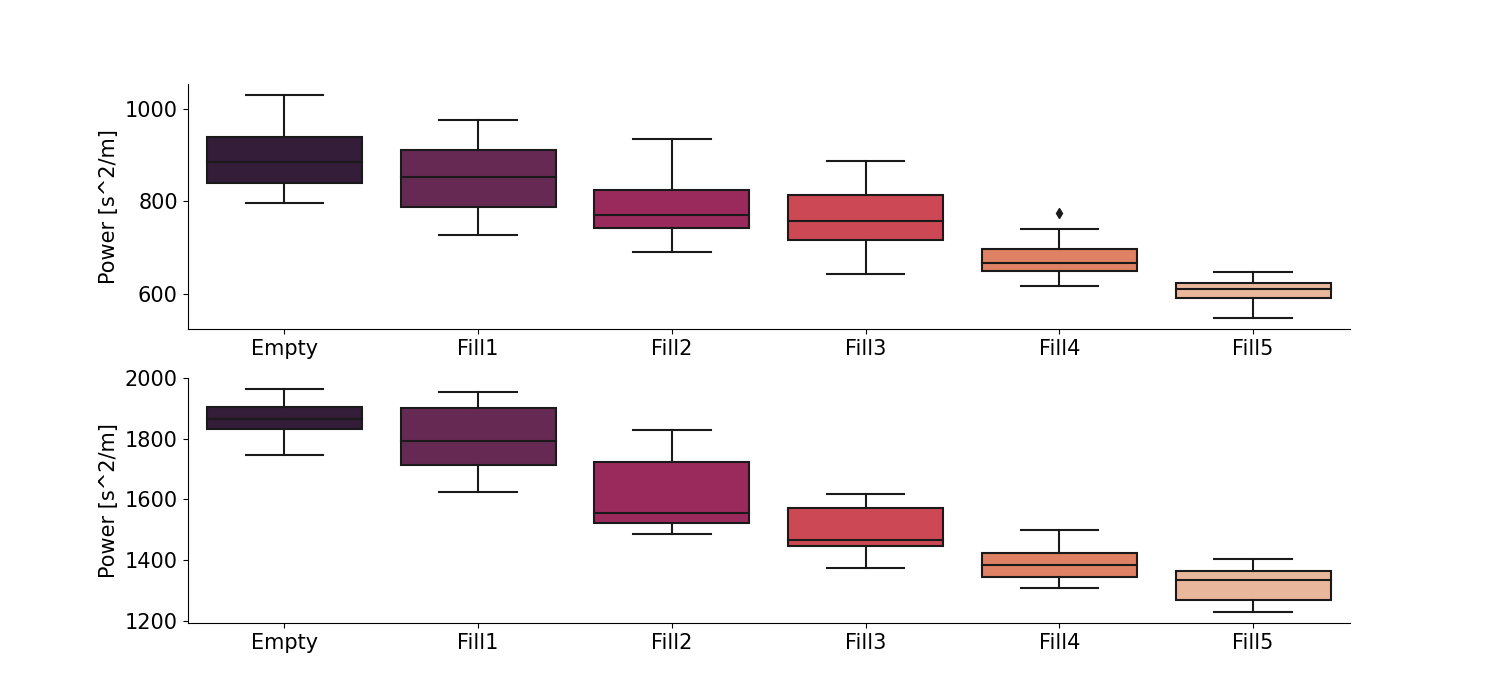

In [38]:
N_ACTS = 2
fig, ax = matplotlib.pyplot.subplots(1, N_ACTS, figsize=(7,13))

matplotlib.rcParams.update({'font.size': 15})

ACTS    = [1, 4]
PALETTE = 'rocket'
FILLINGS_SIZES = dict(zip(list(res_df.water_config.unique()), range(50, 350, 50)))

for i in range(N_ACTS):
    res_df_act = res_df[res_df.actuator == ACTS[i]]

    # Plot experiments
    _ = seaborn.scatterplot(data=res_df_act, x='fft_val', y='set', hue='water_config', hue_order=list(FILLINGS_SIZES.keys()), size='water_config', sizes=FILLINGS_SIZES, ax=ax[i], palette=PALETTE)
    _ = ax[i].set_yticks(list(res_df_act.set.unique()))
    _ = ax[i].set_yticklabels(['Diagonal', 'Reverse-diagonal', 'Uniform'], rotation=90, va='center')

    if i == 1 :
        _ = ax[i].legend(loc='upper left', bbox_to_anchor=(0.60, 0.80), fancybox=True, shadow=True)
    else :
        _ = ax[i].legend([],[], frameon=False)

    _ = ax[i].set_ylim([min(list(res_df_act.set.unique()))-0.3, max(list(res_df_act.set.unique()))+0.2])
    _ = ax[i].set_ylabel("")
    _ = ax[i].set_xlabel("")

    _ = ax[i].invert_xaxis()
    _ = ax[i].invert_yaxis()
    _ = ax[i].xaxis.tick_top()
    
    _ = ax[i].spines['bottom'].set_visible(False)
    _ = ax[i].spines['right'].set_visible(False)



N_ACTS = 2
fig, ax = matplotlib.pyplot.subplots(N_ACTS, 1, figsize=(15,7))

matplotlib.rcParams.update({'font.size': 15})

ACTS    = [1, 4]
PALETTE = 'rocket'
FILLINGS_SIZES = dict(zip(list(res_df.water_config.unique()), range(20, 171, 30)))

for i in range(N_ACTS):
    res_df_act = res_df[res_df.actuator == ACTS[i]]

    # Plot global
    _ = seaborn.boxplot(data=res_df_act, x='water_config', y='fft_val', ax=ax[i], palette=PALETTE)
    # _ = ax[i].set_xticks(range(6))
    # _ = ax[i].set_xticklabels(FILLINGS_LABELS)

    # _ = ax[i].set_xlim([min(list(res_df_act.set.unique()))-1, max(list(res_df_act.set.unique()))+0.2])
    _ = ax[i].set_xlabel("")
    _ = ax[i].set_ylabel("Power [s^2/m]")


    _ = ax[i].spines['top'].set_visible(False)
    _ = ax[i].spines['right'].set_visible(False)

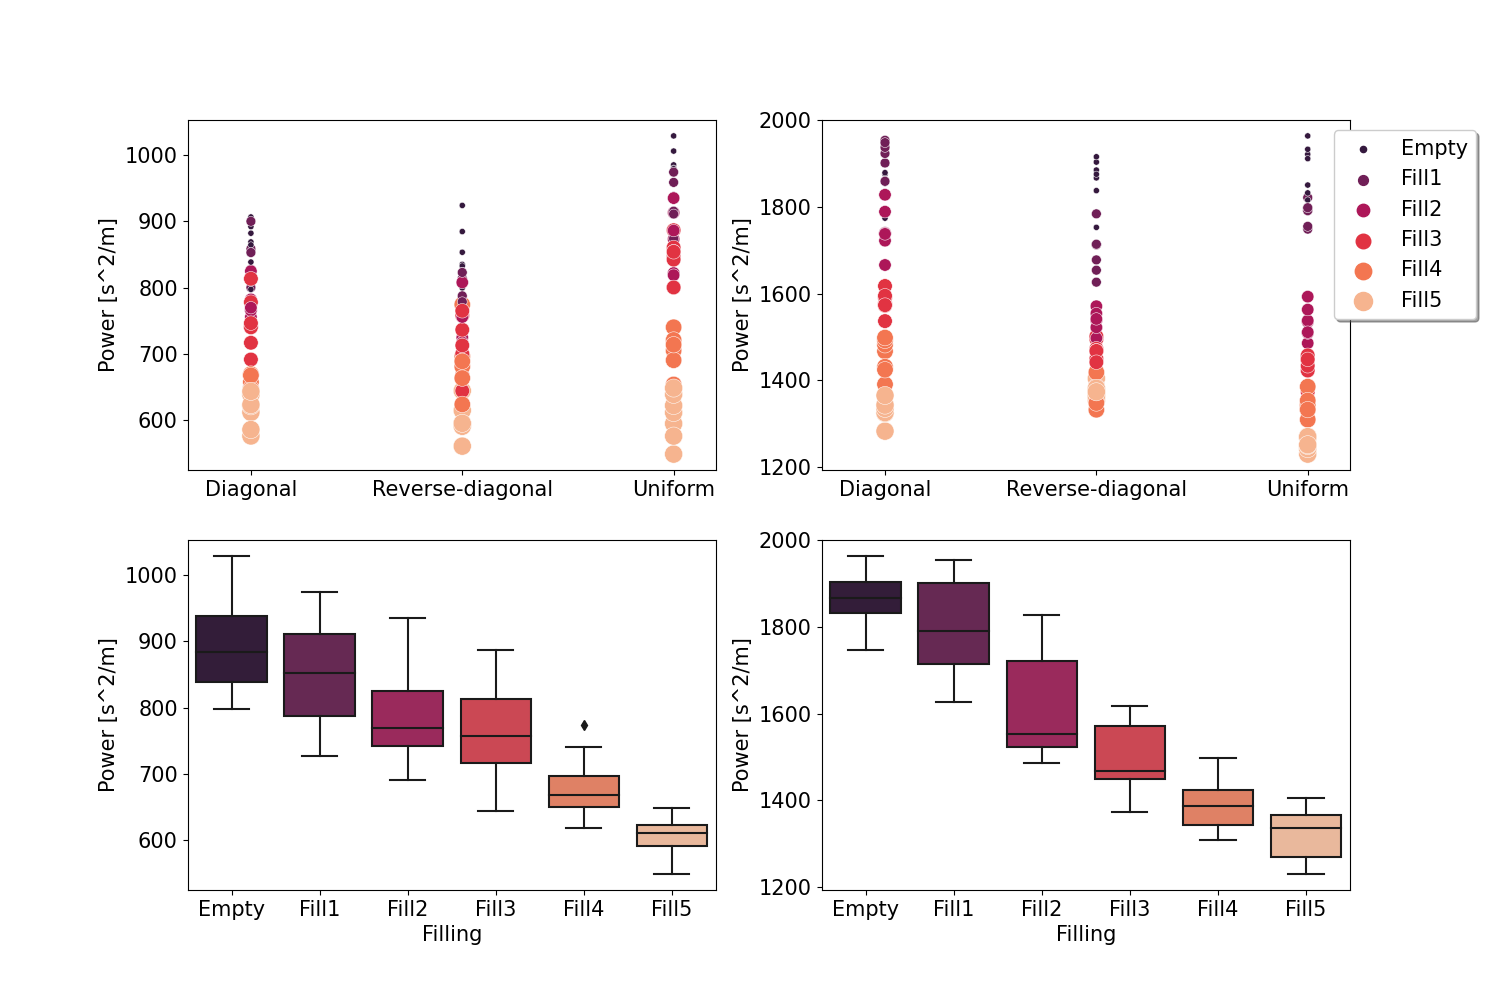

In [12]:
N_ACTS = 2
fig, ax = matplotlib.pyplot.subplots(2, N_ACTS, figsize=(15,10))

matplotlib.rcParams.update({'font.size': 15})

ACTS    = [1, 4]
PALETTE = 'rocket'
FILLINGS_SIZES = dict(zip(list(res_df.water_config.unique()), range(20, 171, 30)))

for i in range(N_ACTS):
    res_df_act = res_df[res_df.actuator == ACTS[i]]

    # Plot experiments
    _ = seaborn.scatterplot(data=res_df_act, x='set', y='fft_val', hue='water_config', hue_order=list(FILLINGS_SIZES.keys()), size='water_config', sizes=FILLINGS_SIZES, ax=ax[0,i], palette=PALETTE)
    _ = ax[0,i].set_xticks(list(res_df_act.set.unique()))
    _ = ax[0,i].set_xticklabels(['Diagonal', 'Reverse-diagonal', 'Uniform'])

    if i == 1 :
        _ = ax[0,i].legend(loc='upper left', bbox_to_anchor=(0.95, 1), fancybox=True, shadow=True)
    else :
        _ = ax[0,i].legend([],[], frameon=False)

    _ = ax[0,i].set_xlim([min(list(res_df_act.set.unique()))-0.3, max(list(res_df_act.set.unique()))+0.2])
    _ = ax[0,i].set_xlabel("")
    _ = ax[0,i].set_ylabel("Power [s^2/m]")


    # Plot global
    _ = seaborn.boxplot(data=res_df_act, x='water_config', y='fft_val', ax=ax[1,i], palette=PALETTE)
    # _ = ax[1,i].set_xticks(range(6))
    # _ = ax[1,i].set_xticklabels(FILLINGS_LABELS)

    # _ = ax[1,i].set_xlim([min(list(res_df_act.set.unique()))-1, max(list(res_df_act.set.unique()))+0.2])
    _ = ax[1,i].set_xlabel("Filling")
    _ = ax[1,i].set_ylabel("Power [s^2/m]")
